In [67]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [68]:
# import the dataset xls file
df = pd.read_excel('heart_failure_clinical_records_dataset.xlsx', engine='openpyxl')


In [69]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [70]:
# checking for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [71]:
# check the data types
df.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [72]:
# describe the columns data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


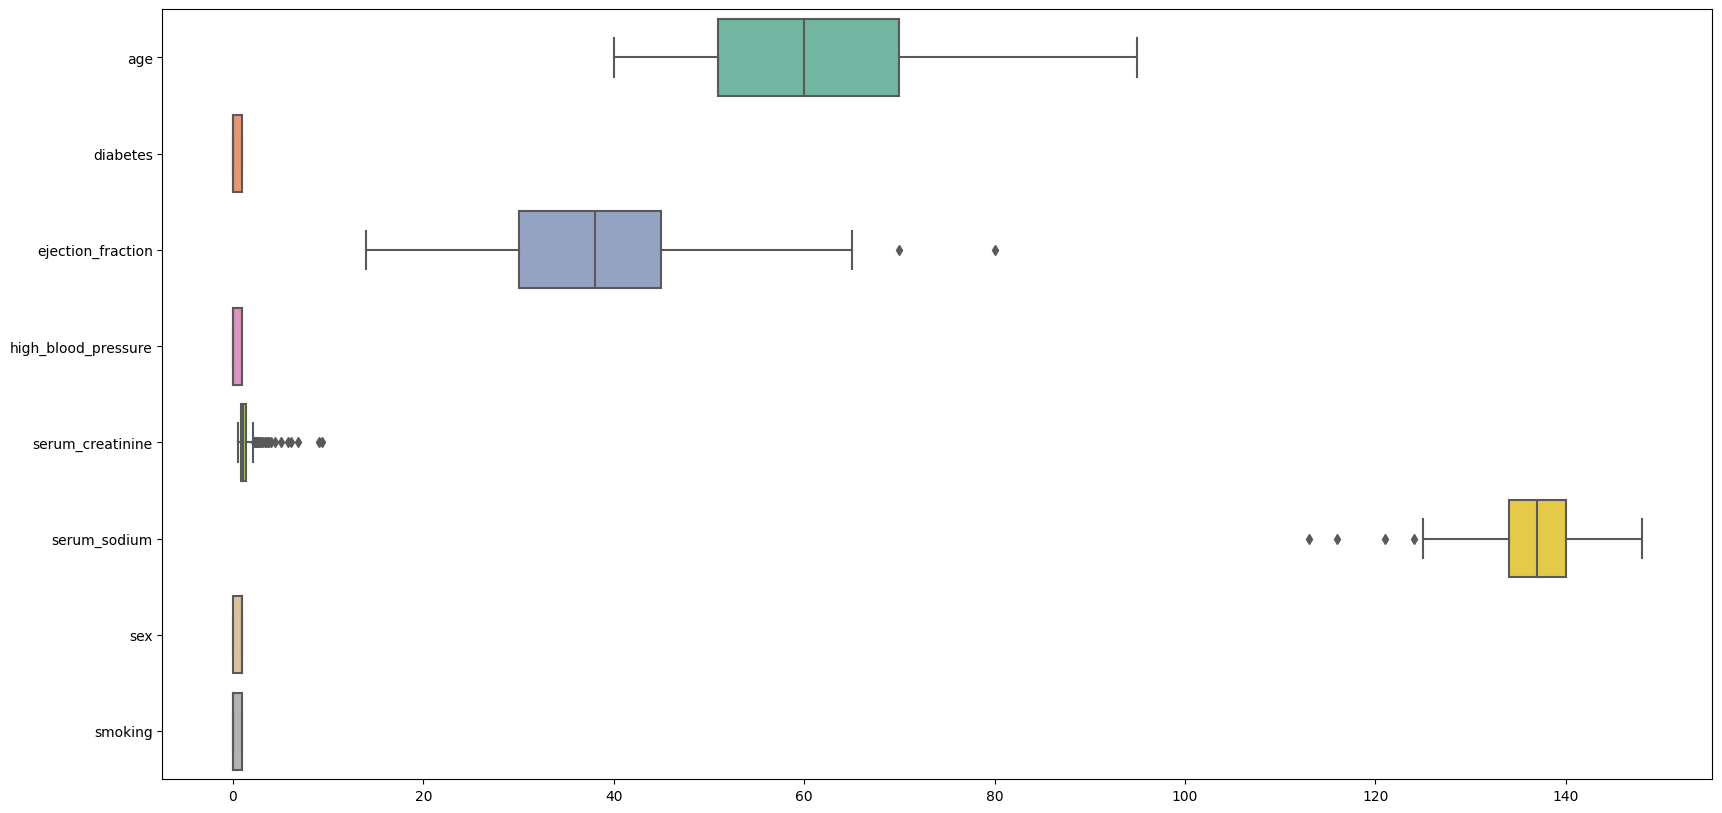

In [73]:
# check for outliers using a boxplot on all the columns in the dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df.iloc[:,[0,3,4,5,7,8,9,10]], orient='h', palette='Set2')
plt.show()


Following a youtube tutorial on building an artificial neural network for classification
https://www.youtube.com/watch?v=OJ_sKj7gqYA 

In [74]:
# split the data into train and test sets
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [75]:
# input dimension which is essentially the number of columns in the X_train dataset
inp_dim = len(X_train.columns)

# a random neuron number which is how wide the dataset is. I multiplied the input dimension by 16. 
neurons = 192
# epochs is the number of times the model will run through the dataset with the aim of getting more accurate every time
# running it to many times can cause overfitting
epochs = 100 
# this will create a sequetial model which is a linear stack of layers
model = Sequential() 

2022-11-17 18:02:22.290664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
# this will add the first layer to the model called the activation layer
# the activation layer is the input layer
# adding a dense layer means that every neuron in the layer is connected to every neuron in the next layer
# the number of neurons is the width of the layer
# the activation function is the function that is applied to the weighted sum of the inputs
# the relu 'rectified linear unit' function is used to return the maximum of 0 or the input
model.add(Dense(neurons, input_dim=inp_dim, activation='relu'))
# this next layer is an output layer, there are no hidden layers in this model
# the 1 specifies the number of outputs which is 1 in this case
# the sigmoid function is used to return a value between 0 and 1
model.add(Dense(1, activation='sigmoid'))
# next we compile the model
# binary_crossentropy is used for binary classification ie 1 or 0  (death or no death)
# the adam optimiser is used to update the network weights iteratively based on training data
# the weight and bias are the numbers that can be tweeked to get the best accuracy
# the learning rate for the optomiser is the step size that will be taken when updating the weights, this can be tweeked to get the best accuracy
# the accuracy is the metric that will be used to evaluate the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
# fit the model to the training data
# by capturing the results in the history variable we can see the accuracy and loss over the epochs later on
# verbose is set to 1 so that the progress bar is displayed and will give us a lot of feedback
# the validation_split is set to .33 so we can gragh the validation in the training phase and see how the model is performing 
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
5/5 [==============================] - 1s 63ms/step - loss: 17502.1992 - accuracy: 0.2750 - val_loss: 7618.0640 - val_accuracy: 0.3671
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 4987.5181 - accuracy: 0.3625 - val_loss: 1099.6382 - val_accuracy: 0.6329
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1755.2086 - accuracy: 0.7250 - val_loss: 3708.3181 - val_accuracy: 0.6329
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 3003.3208 - accuracy: 0.7250 - val_loss: 3985.8560 - val_accuracy: 0.6329
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2673.6997 - accuracy: 0.7250 - val_loss: 2704.5342 - val_accuracy: 0.6329
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1444.4983 - accuracy: 0.7250 - val_loss: 519.9717 - val_accuracy: 0.6329
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 938.1808 - accuracy: 0.4750 - val_loss: 1218.8304 - val_ac

In [78]:
# make predictions
predictions = model.predict(X_test)
# for prediction greater than 0.5 we will round up to 1 the rest will be rounded down to 0
predictions = (predictions > 0.5)*1


2/2 [==============================] - 0s 2ms/step


In [79]:
# capture the output of the model in a dataframe
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})

In [80]:
output.to_csv('output.csv', index=False)

In [83]:
# evalute the model and print them out to see how well we did 
# return the loss value and metrics values for the model in test mode

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss is: ', loss)
print('Accuracy is: ', accuracy)

Loss is:  18.030078887939453
Accuracy is:  0.7166666388511658


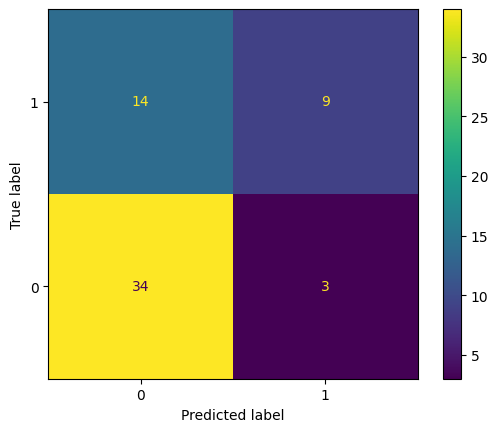

In [82]:
cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# there are a high amount of false positives which could mean it is underfitting 

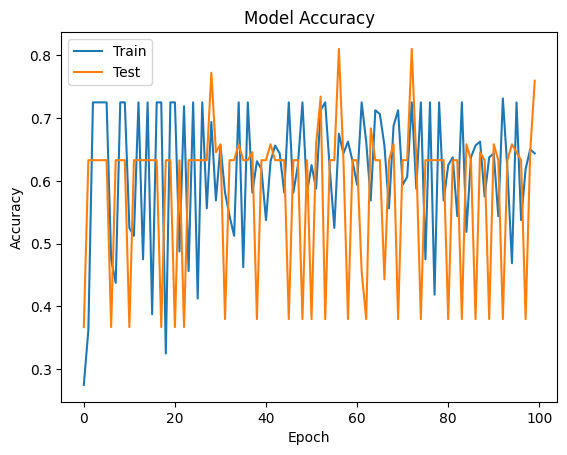

In [88]:
# plot accuracy results at every epochs 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# the accuracy is eradically changing which means the model is not learning


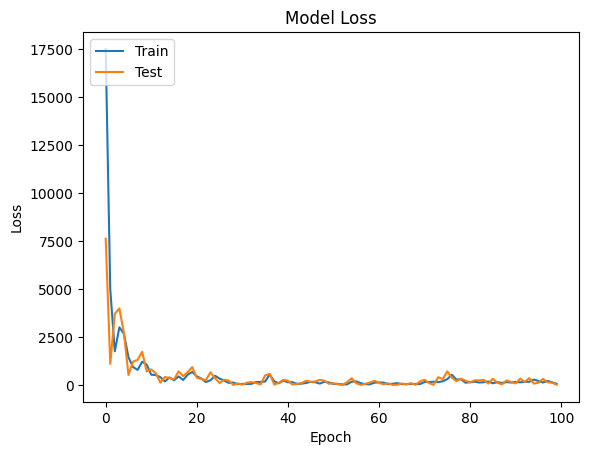

In [89]:
# plot the loss at every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# the loss is a bit more stable but still not great 